# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 预处理

In [1]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [2]:
output_path =  '/Users/tianyc/Documents/python/LDA/LDA_document/result_test'
file_path = '/Users/tianyc/Documents/python/LDA/LDA_document/data'
os.chdir(file_path)
data=pd.read_excel("data.xlsx")#content type
os.chdir(output_path)
dic_file = "/Users/tianyc/Documents/python/LDA/LDA_document/stop_dic/dict.txt"
stop_file = "/Users/tianyc/Documents/python/LDA/LDA_document/stop_dic/stopwords.txt"

In [3]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

In [4]:
data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p3/fy_k3_cx34g68bznfywdw0sm0000gn/T/jieba.cache
Loading model cost 0.468 seconds.
Prefix dict has been built successfully.


## LDA分析

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [7]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content_cutted)

In [8]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=8,
                          random_state=0)

### 输出每个主题对应词语 

In [10]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
专家 网友 老师 压力 走势 分析 黄金 突破 大盘 问题 股票 建议 新浪 整理 成本 调整 机会 坐堂 趋势 后市 股市 行情 市场 价位 阻力
Topic #1:
比赛 电子竞技 游戏 项目 总决赛 玩家 冠军 战队 赛事 奖金 赛区 世界 星际争霸 俱乐部 决赛 网吧 活动 现场 时间 职业 大赛 全国 国际 组委会 大奖赛
Topic #2:
投资 经济 市场 公司 政府 发展 企业 政策 问题 网站 计划 银行 手机 行业 服务 国家 互联网 资金 基金 业务 管理 影响 记者 文章 信息
Topic #3:
游戏 研究 时间 科学家 人类 人们 世界 玩家 人员 消息 技术 任务 问题 系统 利用 历史 科技 中心 太空 模式 杂志 科学 公司 过程 汽车
Topic #4:
学生 大学 学校 教育 工作 专业 移民 孩子 问题 语言 留学生 情况 能力 国家 家长 计划 国际 课程 论文 英语 生活 费用 学费 培训 家庭
Topic #5:
电影 主持人 票房 影片 观众 演员 作品 朋友 故事 新浪 感觉 合作 娱乐 电影节 现场 角色 记者 时间 主演 媒体 投票 生活 方面 市场 香港电影
Topic #6:
比赛 主队 赔率 球队 主场 客场 火箭 球员 数据 时间 篮板 奇才 公司 本场 足彩 情况 客胜 联赛 状态 问题 体育讯 新浪 助攻 机会 优势
Topic #7:
项目 建筑 生活 发展 地产 新浪 空间 区域 户型 活动 房子 别墅 设计 主持人 文化 产品 国际 市场 中心 艺术 论坛 集团 地方 开发商 客户


### 输出每篇文章对应主题 

In [11]:
import numpy as np

In [12]:
topics=lda.transform(tf)

In [13]:
topic = []
for t in topics:
    topic.append(list(t).index(np.max(t)))
data['topic']=topic
data.to_excel("data_topic.xlsx",index=False)

In [14]:
#topics[0]#第一篇文章对应各个主题的分数

array([0.00277897, 0.00278442, 0.00277951, 0.00278207, 0.0027824 ,
       0.0027813 , 0.9805287 , 0.00278263])

## 可视化 

In [15]:
import pyLDAvis
import pyLDAvis.sklearn

/Users/tianyc/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [16]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.display(pic)

/Users/tianyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/tianyc/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/Users/tianyc/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tianyc/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docume

## 困惑度 

In [17]:
import matplotlib.pyplot as plt

In [18]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


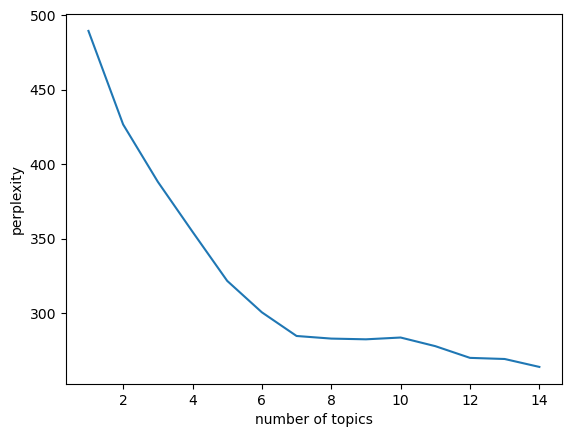

In [19]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

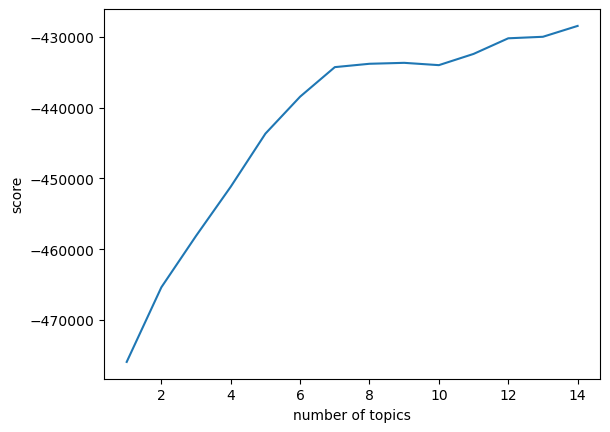

In [20]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,scores[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()